In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('drive/My Drive/Major Project/MajorProjectData.csv')

In [10]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,12/06/2017,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
products = df.groupby(['Product Name'])

In [12]:
df_sales = pd.read_csv('drive/My Drive/Major Project/MajorProjectData.csv')

In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9800 non-null   int64  
 1   Row ID         9800 non-null   int64  
 2   Order ID       9800 non-null   object 
 3   Order Date     9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Region         9800 non-null   object 
 8   Product ID     9800 non-null   object 
 9   Category       9800 non-null   object 
 10  Sub-Category   9800 non-null   object 
 11  Product Name   9800 non-null   object 
 12  Sales          9800 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 995.4+ KB


In [14]:
store_sales = pd.read_csv('drive/My Drive/Major Project/MajorProjectData.csv')
store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'])
store_sales = store_sales.rename(columns={'Order Date':'date'})
store_sales.head()

<ipython-input-14-b5a3eac9a947>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'])


,Unnamed: 0,Row ID,Order ID,date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,2017-12-06,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
print(len(monthly_sales['date']))
monthly_sales = monthly_sales[['date','Sales']]
monthly_sales.head()

48


<ipython-input-15-ebff6f5096f3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = store_sales.groupby('date').sum().reset_index()


,date,Sales
0,2015-01-01,28828.254
1,2015-02-01,12588.484
2,2015-03-01,54027.692
3,2015-04-01,24710.016
4,2015-05-01,29520.490


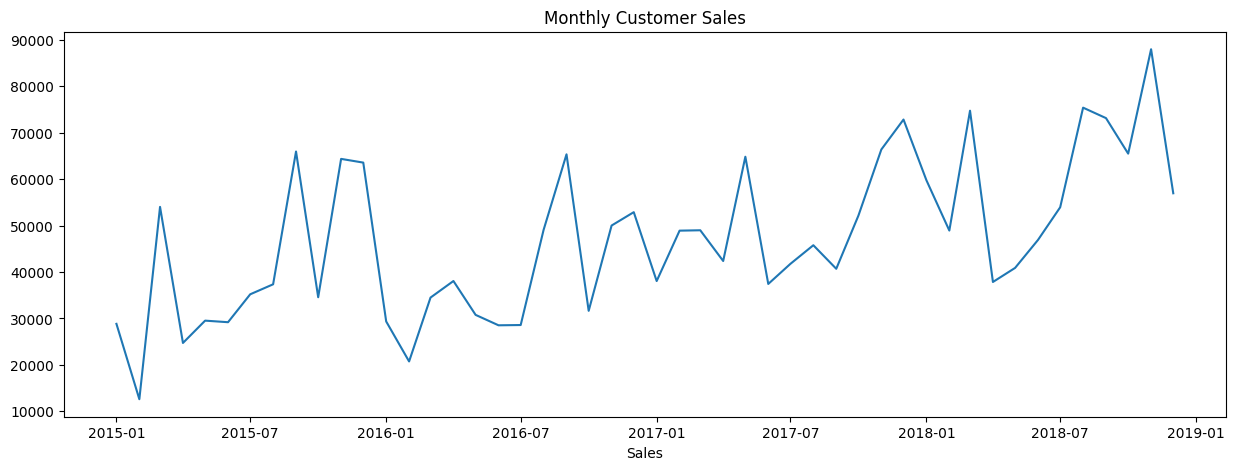

In [16]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['Sales'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

Purchase Dataset Creation

In [17]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,12/06/2017,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9800 non-null   int64  
 1   Row ID         9800 non-null   int64  
 2   Order ID       9800 non-null   object 
 3   Order Date     9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Region         9800 non-null   object 
 8   Product ID     9800 non-null   object 
 9   Category       9800 non-null   object 
 10  Sub-Category   9800 non-null   object 
 11  Product Name   9800 non-null   object 
 12  Sales          9800 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 995.4+ KB


In [19]:
purchase = pd.DataFrame(df.sample(n=150,replace=False))

In [20]:
purchase.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
4389,4389,4390,CA-2018-111556,20/11/2018,TM-11920,Taslim,Consumer,East,FUR-BO-10003159,Furniture,Bookcases,"Sauder Camden County Collection Libraries, Pla...",183.968
8435,8435,8436,US-2015-127635,14/09/2015,SY-20260,Sanjay,Corporate,Central,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,8.552
6642,6642,6643,CA-2018-128328,05/08/2018,PY-18865,Prity,Consumer,Central,OFF-LA-10003498,Office Supplies,Labels,Avery 475,133.200
6250,6250,6251,CA-2018-121580,29/05/2018,GM-17410,Guluram,Consumer,Central,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,7.980
8772,8772,8773,CA-2018-115882,14/09/2018,BA-13555,Brajendra,Corporate,South,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,74.352


In [21]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 4389 to 6180
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     150 non-null    int64  
 1   Row ID         150 non-null    int64  
 2   Order ID       150 non-null    object 
 3   Order Date     150 non-null    object 
 4   Customer ID    150 non-null    object 
 5   Customer Name  150 non-null    object 
 6   Segment        150 non-null    object 
 7   Region         150 non-null    object 
 8   Product ID     150 non-null    object 
 9   Category       150 non-null    object 
 10  Sub-Category   150 non-null    object 
 11  Product Name   150 non-null    object 
 12  Sales          150 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 16.4+ KB


In [22]:
purchase = purchase.drop(columns=['Unnamed: 0','Customer ID','Customer Name','Region'],axis=1)
purchase.head()

,Row ID,Order ID,Order Date,Segment,Product ID,Category,Sub-Category,Product Name,Sales
4389,4390,CA-2018-111556,20/11/2018,Consumer,FUR-BO-10003159,Furniture,Bookcases,"Sauder Camden County Collection Libraries, Pla...",183.968
8435,8436,US-2015-127635,14/09/2015,Corporate,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,8.552
6642,6643,CA-2018-128328,05/08/2018,Consumer,OFF-LA-10003498,Office Supplies,Labels,Avery 475,133.200
6250,6251,CA-2018-121580,29/05/2018,Consumer,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,7.980
8772,8773,CA-2018-115882,14/09/2018,Corporate,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,74.352


In [23]:
purchase['Order Date']=pd.to_datetime(purchase['Order Date'],infer_datetime_format=True)

In [24]:
newdatecol = []
for i in purchase['Order Date']:
  newdate = str(i.day)+"/12"+"/2018"
  newdatecol.append(newdate)
purchase['Order Date']=pd.to_datetime(newdatecol,infer_datetime_format=True)
purchase.head()

,Row ID,Order ID,Order Date,Segment,Product ID,Category,Sub-Category,Product Name,Sales
4389,4390,CA-2018-111556,2018-12-20,Consumer,FUR-BO-10003159,Furniture,Bookcases,"Sauder Camden County Collection Libraries, Pla...",183.968
8435,8436,US-2015-127635,2018-12-14,Corporate,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,8.552
6642,6643,CA-2018-128328,2018-12-05,Consumer,OFF-LA-10003498,Office Supplies,Labels,Avery 475,133.200
6250,6251,CA-2018-121580,2018-12-29,Consumer,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,7.980
8772,8773,CA-2018-115882,2018-12-14,Corporate,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,74.352


In [25]:
purchase.rename(columns={'Sales':'Purchase'},inplace=True)
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 4389 to 6180
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        150 non-null    int64         
 1   Order ID      150 non-null    object        
 2   Order Date    150 non-null    datetime64[ns]
 3   Segment       150 non-null    object        
 4   Product ID    150 non-null    object        
 5   Category      150 non-null    object        
 6   Sub-Category  150 non-null    object        
 7   Product Name  150 non-null    object        
 8   Purchase      150 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 11.7+ KB


In [26]:
purchase['Purchase'] = purchase['Purchase']-(purchase['Purchase']*5/100)
purchase.head()

,Row ID,Order ID,Order Date,Segment,Product ID,Category,Sub-Category,Product Name,Purchase
4389,4390,CA-2018-111556,2018-12-20,Consumer,FUR-BO-10003159,Furniture,Bookcases,"Sauder Camden County Collection Libraries, Pla...",174.7696
8435,8436,US-2015-127635,2018-12-14,Corporate,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,8.1244
6642,6643,CA-2018-128328,2018-12-05,Consumer,OFF-LA-10003498,Office Supplies,Labels,Avery 475,126.5400
6250,6251,CA-2018-121580,2018-12-29,Consumer,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,7.5810
8772,8773,CA-2018-115882,2018-12-14,Corporate,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,70.6344


In [27]:
purchase.to_csv('order.csv')

In [28]:
#from google.colab import files
#files.download('order.csv')

In [29]:
top_purchase_category = purchase.groupby('Category').sum()['Purchase'].reset_index()
category = top_purchase_category['Category']
category_purchase = top_purchase_category['Purchase']
categorylist = dict(zip(category,category_purchase))

top_purchase_segment = purchase.groupby('Segment').sum()['Purchase'].reset_index()
segment = top_purchase_segment['Segment']
segment_purchase = top_purchase_segment['Purchase']
segmentlist = dict(zip(segment,segment_purchase))

top_df_pr=purchase[["Product Name","Purchase"]]
top_df_pr=top_df_pr.sort_values(by="Purchase",ascending=False)
top_df_pr=top_df_pr.groupby("Product Name").sum()
top_df_pr=top_df_pr.reset_index()
top_df_pr=top_df_pr.sort_values(by="Purchase",ascending=False,ignore_index=True).head(5)
top_products_purchase = dict(zip(list(top_df_pr['Product Name']),list(top_df_pr['Purchase'])))

bottom_df_pr=purchase[["Product Name","Purchase"]]
bottom_df_pr=bottom_df_pr.sort_values(by="Purchase",ascending=True)
bottom_df_pr=bottom_df_pr.groupby("Product Name").sum()
bottom_df_pr=bottom_df_pr.reset_index()
bottom_df_pr=bottom_df_pr.sort_values(by="Purchase",ascending=True,ignore_index=True).head(5)
bottom_products_purchase = dict(zip(list(bottom_df_pr['Product Name']),list(bottom_df_pr['Purchase'])))

df_sub=purchase[["Sub-Category","Purchase"]]
df_sub=df_sub.groupby("Sub-Category").sum()
df_sub=df_sub.reset_index()
df_sub=df_sub.sort_values(by="Purchase",ascending=True,ignore_index=True)
subcategorylist = dict(zip(list(df_sub['Sub-Category']),list(df_sub['Purchase'])))

<ipython-input-29-7ca9231e3e04>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_purchase_category = purchase.groupby('Category').sum()['Purchase'].reset_index()
<ipython-input-29-7ca9231e3e04>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_purchase_segment = purchase.groupby('Segment').sum()['Purchase'].reset_index()


In [30]:
top_df_pr

,Product Name,Purchase
0,HON 5400 Series Task Chairs for Big and Tall,4195.3653
1,Samsung Galaxy Mega 6.3,2872.7316
2,Office Star - Professional Matrix Back Chair w...,2667.4480
3,Canon PC1080F Personal Copier,1709.9715
4,GBC Ibimaster 500 Manual ProClick Binding System,1301.2758


In [31]:
import plotly.express as px
fig = px.pie(top_purchase_category,names='Category',values='Purchase'
             ,title='Segment w.r.t Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

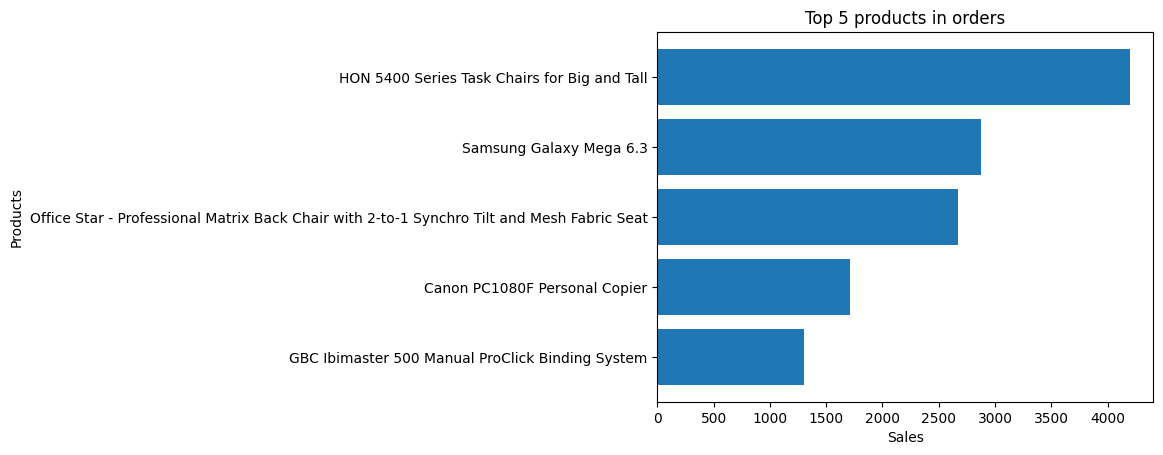

In [32]:
plt.barh(top_df_pr['Product Name'][::-1],top_df_pr['Purchase'][::-1])
plt.title('Top 5 products in orders')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()

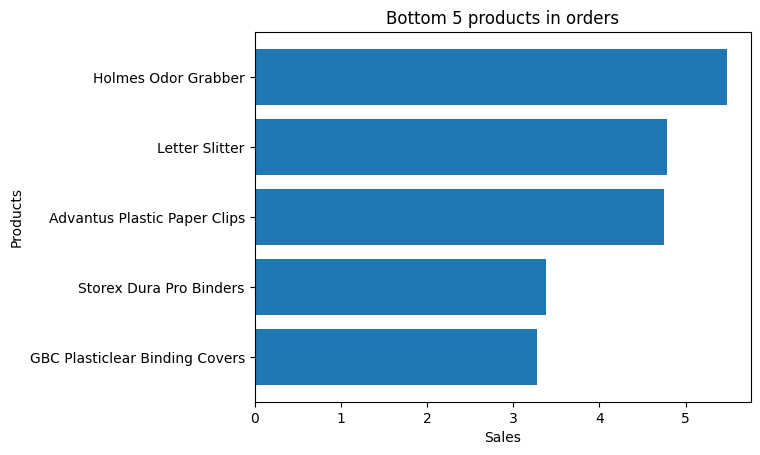

In [33]:
plt.barh(bottom_df_pr['Product Name'],bottom_df_pr['Purchase'])
plt.title('Bottom 5 products in orders')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()